In [2]:
import pandas_datareader as pdr

In [5]:
from tiingo import TiingoClient
client = TiingoClient()


RuntimeError: Tiingo API Key not provided. Please provide via environment variable or config argument.

In [3]:
df=pdr.get_data_tiingo('AAPl')

ValueError: The tiingo API key must be provided either through the api_key variable or through the environmental variable TIINGO_API_KEY.

In [6]:
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [7]:
df1=df.reset_index()['close']

In [8]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

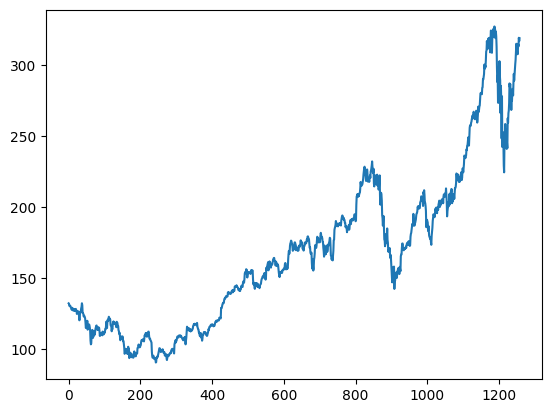

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
train_size=int(len(df1)*0.7)
test_size=len(df1)-train_size
train_data,test_data=df1[:train_size,:],df1[train_size:len(df1),:1]

In [14]:
def create_dataset(dataset,timestep):
    dataX,datay=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        dataX.append(a)
        datay.append(dataset[i+timestep,0])
    return np.array(dataX),np.array(datay)


In [15]:
X_train,y_train=create_dataset(train_data,100)
X_test,y_test=create_dataset(test_data,100)

In [16]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.38769737, 0.39723888, 0.39609896, ..., 0.48184582, 0.43836021,
        0.43016972],
       [0.39723888, 0.39609896, 0.40175631, ..., 0.43836021, 0.43016972,
        0.40724479],
       [0.39609896, 0.40175631, 0.40010977, ..., 0.43016972, 0.40724479,
        0.42670776]], shape=(779, 100))

In [17]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Input

In [20]:
model=Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile('adam','mse')

In [21]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - loss: 0.0095 - val_loss: 0.0070
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0010 - val_loss: 0.0045
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 7.2565e-04 - val_loss: 0.0073
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 6.9440e-04 - val_loss: 0.0069
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 6.7555e-04 - val_loss: 0.0055
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 6.6047e-04 - val_loss: 0.0053
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 7.1987e-04 - val_loss: 0.0080
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 6.1650e-04 - val_loss: 0.0040
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - loss: 6.3756e-04 - val_loss: 0.0038
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 5.7207e-04 - val_loss: 0.0050
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 5.5860e-04 - val_loss: 0.0039
Epoc